# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


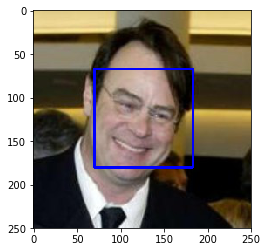

In [20]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [18]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
missed_humans = 0
missed_dogs = 0
for himg, dimg in tqdm(zip(human_files_short, dog_files_short)):
    missed_humans += not (face_detector(himg))
    missed_dogs += face_detector(dimg)
human_acc = (len(human_files_short) - missed_humans )/ len(human_files_short)
dog_acc = (len(dog_files_short) - missed_dogs) / len(dog_files_short)
total_h_acc = (human_acc*len(human_files_short) + dog_acc*len(dog_files_short))/(len(dog_files_short) + len(human_files_short))
print('human_accuracy: %.2f' % human_acc)
print('dogs as human: %.2f' % (1-dog_acc))
print('Accuracy in human detection: %.3f' % total_h_acc)

100it [00:32,  3.03it/s]

human_accuracy: 0.98
dogs as human: 0.17
Accuracy in human detection: 0.905


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.
def check_detection_acc(face_cascade):
    human_files_short = human_files[:100]
    dog_files_short = dog_files[:100]
    missed_humans = 0
    missed_dogs = 0
    for himg, dimg in tqdm(zip(human_files_short, dog_files_short)):
        missed_humans += not (face_detection(himg,face_cascade))
        missed_dogs += face_detection(dimg,face_cascade)
    human_acc = (len(human_files_short) - missed_humans )/ len(human_files_short)
    dog_acc = (len(dog_files_short) - missed_dogs) / len(dog_files_short)
    total_h_acc = (human_acc*len(human_files_short) + dog_acc*len(dog_files_short))/(len(dog_files_short) + len(human_files_short))
    return human_acc, dog_acc, total_h_acc

def face_detection(img_path, face_cascade):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [6]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.
face_cascade_ = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')
h_a, d_a, th_a = check_detection_acc(face_cascade_)
print('human_accuracy: %.2f' % h_a)
print('dogs as human: %.2f' % (1-d_a))
print('Accuracy in human detection: %.3f' % th_a)

100it [01:28,  3.05it/s]

human_accuracy: 0.98
dogs as human: 0.17
Accuracy in human detection: 0.905


In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.
face_cascade_ = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
h_a, d_a, th_a = check_detection_acc(face_cascade_)
print('human_accuracy: %.2f' % h_a)
print('dogs as human: %.2f' % (1-d_a))
print('Accuracy in human detection: %.3f' % th_a)

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.
face_cascade_ = cv2.CascadeClassifier('haarcascades/haarcascade_smile.xml')
h_a, d_a, th_a = check_detection_acc(face_cascade_)
print('human_accuracy: %.2f' % h_a)
print('dogs as human: %.2f' % (1-d_a))
print('Accuracy in human detection: %.3f' % th_a)

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [1]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:05<00:00, 103950416.25it/s]


Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [16]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path, img_size, model):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    img = Image.open(img_path)
    in_transform = transforms.Compose([
        transforms.CenterCrop(img_size),
        transforms.ToTensor(),
   #     transforms.Normalize()
    ])
    image = in_transform(img).unsqueeze(0)
#    print(image.shape)
    ## Return the *index* of the predicted class for that image
    model.eval()
    _, pred_idx = torch.max(model(image),1) 
    return pred_idx # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [2]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path, img_size, model = VGG16):
    ## TODO: Complete the function.
    output = VGG16_predict(img_path,img_size, model) 
    return output in range(151,268)

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [18]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

human_as_dog = 0
dog_wclassified = 0

for img_path in tqdm(human_files_short):
    human_as_dog += dog_detector(img_path, 224)
       
for img_path in tqdm(dog_files_short):
    dog_wclassified += dog_detector(img_path, 224)
h_accuracy = (len(human_files_short)-human_as_dog)/len(human_files_short)
d_accuracy = dog_wclassified / len(dog_files_short)
print("human misclassified as dogs: %.2f %%" %(1-h_accuracy))
print("dogs well-classified as dogs: %.2f %%" %d_accuracy)


100%|██████████| 100/100 [01:28<00:00,  1.11it/s]

human misclassified as dogs: 0.00 %
dogs well-classified as dogs: 0.59 %


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [6]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

# define Inception V3 model
IncV3 = models.inception_v3(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    IncV3 = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:01<00:00, 99235441.35it/s]


In [7]:
# ResNet-50
# define Resnet50 model
RNET = models.resnet50(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    RNET = VGG16.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 87675184.45it/s]


In [9]:
def check_detector_performance(input_img_size = 224, model = VGG16, detector = dog_detector):
    human_files_short = human_files[:100]
    dog_files_short = dog_files[:100]

    human_as_dog = 0
    dog_wclassified = 0

    for img_path in tqdm(human_files_short):
        human_as_dog += detector(img_path, input_img_size, model)

    for img_path in tqdm(dog_files_short):
        dog_wclassified += detector(img_path, input_img_size, model)
        
    h_accuracy = (len(human_files_short)-human_as_dog)/len(human_files_short)
    d_accuracy = dog_wclassified / len(dog_files_short)
    return h_accuracy, d_accuracy

In [23]:
h_acc, d_acc = check_detector_performance(224, VGG16, dog_detector)
print("human misclassified as dogs: %.2f" %h_acc)
print("dogs well-classified as dogs: %.2f" %d_acc) 

100%|██████████| 100/100 [01:21<00:00,  1.19it/s]

human misclassified as dogs: 1.00
dogs well-classified as dogs: 0.59


In [24]:
h_acc, d_acc = check_detector_performance(448, IncV3, dog_detector)
print("human misclassified as dogs: %.2f" %h_acc)
print("dogs well-classified as dogs: %.2f" %d_acc) 

100%|██████████| 100/100 [01:33<00:00,  1.14it/s]

human misclassified as dogs: 1.00
dogs well-classified as dogs: 0.96


In [16]:
h_acc, d_acc = check_detector_performance(224, RNET, dog_detector)
print("human misclassified as dogs: %.2f" %h_acc)
print("dogs well-classified as dogs: %.2f" %d_acc) 

100%|██████████| 100/100 [00:30<00:00,  3.39it/s]

human misclassified as dogs: 1.00
dogs well-classified as dogs: 0.75


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [19]:
import os
from torchvision import datasets, transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
def load_data_in_DataLoaders(data_dir, tr_data_transform = transforms.ToTensor(), vt_data_transform = transforms.ToTensor(), batch_size = 20, num_workers = 0):
    # Assemble dir paths
  #  train_dir = os.path.join(data_dir, 'train')
  #  valid_dir = os.path.join(data_dir, 'valid')
  #  test_dir = os.path.join(data_dir, 'test')
    net_stage = ['train', 'valid', 'test']
    # Load Images dataset using ImageFolder
    data_scratch = { item: datasets.ImageFolder(os.path.join(data_dir, item), transform=tr_data_transform) 
                    for item in net_stage}
  #  train_data = datasets.ImageFolder(train_dir, transform=vt_data_transform)
  #  valid_data = datasets.ImageFolder(valid_dir, transform=vt_data_transform)
  #  test_data = datasets.ImageFolder(test_dir, transform=vt_data_transform)
    # Print out info
    for stage in net_stage: 
        print('Num images in',stage, ':', len(data_scratch[stage]) ) 
 #   print('Num training images: ', len(train_data))
 #   print('Num validation images: ', len(valid_data))
 #   print('Num test images: ', len(test_data))
    # Set data Loaders
    # define dataloader parameters
    batch_size = 20
    num_workers=0

    # prepare data loaders
  #  train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,                                               num_workers=num_workers, shuffle=True)
 #   valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size,                                               num_workers=num_workers, shuffle=True)
    loaders_scratch = {item : torch.utils.data.DataLoader(data_scratch[item], batch_size=batch_size, 
                                              num_workers=num_workers, shuffle=True) for item in net_stage}
    
    return loaders_scratch

# Define transforms on the data
tr_data_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(0.05),
    transforms.RandomRotation(30),
    transforms.RandomAffine(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
])
tr_crop_data_transform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(0.05),
    transforms.RandomRotation(30),
    transforms.RandomAffine(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
])
vt_data_transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
])
vt_crop_data_transform = transforms.Compose([
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
])

res_loaders = load_data_in_DataLoaders('/data/dog_images', vt_data_transform, vt_data_transform)
cr_loaders = load_data_in_DataLoaders('/data/dog_images', vt_crop_data_transform, vt_crop_data_transform)

resaug_loaders = load_data_in_DataLoaders('/data/dog_images',  tr_data_transform, vt_data_transform)
craug_loaders = load_data_in_DataLoaders('/data/dog_images', tr_crop_data_transform, vt_crop_data_transform)


Num images in train : 6680
Num images in valid : 835
Num images in test : 836
Num images in train : 6680
Num images in valid : 835
Num images in test : 836
Num images in train : 6680
Num images in valid : 835
Num images in test : 836
Num images in train : 6680
Num images in valid : 835
Num images in test : 836


In [9]:
max_label = 0
labels_num = np.zeros(133)
for images, labels in res_loaders['train']:
    for label in labels:
        labels_num[label] += 1
        if max_label < label:
            max_label = label


In [10]:
print(max_label)
print(labels_num)
len(labels_num)

tensor(132)
[ 64.  58.  52.  63.  77.  64.  50.  66.  34.  50.  66.  66.  46.  69.  73.
  59.  62.  50.  48.  62.  64.  47.  65.  62.  37.  41.  64.  35.  74.  52.
  56.  65.  45.  64.  53.  65.  50.  57.  69.  53.  69.  63.  50.  64.  53.
  67.  54.  54.  50.  50.  62.  49.  47.  57.  50.  65.  71.  50.  47.  60.
  61.  53.  53.  39.  42.  33.  34.  63.  51.  47.  62.  48.  42.  41.  44.
  64.  43.  40.  59.  46.  56.  61.  46.  50.  37.  53.  66.  51.  53.  58.
  57.  44.  35.  44.  49.  43.  50.  46.  42.  34.  48.  29.  58.  42.  31.
  50.  46.  26.  45.  33.  44.  54.  39.  35.  63.  30.  48.  53.  31.  39.
  28.  32.  44.  50.  34.  30.  41.  30.  48.  44.  30.  26.  30.]


133

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

After looking into the "dog_images" folder we can make the following statements:
- There are ~8k images. Which should be initially enough to traing and test a pre-trained network
- Most breed are represented by 5-8 images in the test dataset; whereas there are 50 images for training each breed
- Images have different zoom but most of them contain the dog in the center of the picture without rotation (dog feet are normally at the bottom)
- Full-body pictures are centered too but the head of the dog lies on one side. A crop could erase relevant information related to head shape.  

The following preprocessing has been applied to enhance detection results:
- Image has to be resized to 224 px to feed into VGG16 (Inception uses 448). This resizing can be done either by cropping (Which can result in erasing head or other part of the dog relevant for detection) or by resizing (Which applies perspective perturbations to the picture). As both solutions can hamper proper detection, I encourage testing both. The cell above contains loaders for both transformations. Note that crop in training is randomly performed in an attempt to reduce centerCrop effect during test and validation. 
- Considering a real-world future application, rotation and perspective invariance should be provided by data augmentation. In such a manner rotation, horizontal flip and affine transformation is applied on training data. To monitor the benefit of this fact, loaders without augmentation are also kept. For the test data provided, results should be really similar between augmentation and without as most test images have similar orientation and perspective than training images.
- Normalization can help convergence by reducing pixel-value-variance range between images. Normalization mean and std values taken from: https://github.com/pytorch/examples/blob/97304e232807082c2e7b54c597615dc0ad8f6173/imagenet/main.py#L197-L198

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [5]:
import torch.nn as nn
import torch.nn.functional as F
from collections import OrderedDict
from tqdm import tqdm

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self, dog_breeds):
        super(Net, self).__init__()
        
        ## Define layers of a CNN as Ordered Dicts
        self.features = nn.Sequential(OrderedDict([
            # convolutional layer (gets 224x224x3 image tensor)
            ('conv1', nn.Conv2d(3, 16, 3, padding=1)),
            ('ReLu1', nn.ReLU(True)),
            ('maxpool1', nn.MaxPool2d(2,2)),
            # convolutional layer (gets 128x128x16 tensor)
            ('conv2', nn.Conv2d(16, 32, 3, padding=1)),
            ('ReLu2', nn.ReLU(True)),
            ('maxpool2', nn.MaxPool2d(2,2)),
            # convolutional layer (gets 64x64x32 tensor)
            ('conv3', nn.Conv2d(32, 64, 3, padding=1)),
            ('ReLu3', nn.ReLU(True)),
            ('maxpool3', nn.MaxPool2d(2,2)),
            # convolutional layer (gets 32x32x64 tensor)
            ('conv4', nn.Conv2d(64, 128, 3, padding=1)),
            ('ReLu4', nn.ReLU(True)),
            ('maxpool4', nn.MaxPool2d(2,2)),
            # convolutional layer (gets 16x16x128 tensor)
            ('conv5', nn.Conv2d(128, 256, 3, padding=1)),
            ('ReLu5', nn.ReLU(True)),
            ('maxpool5', nn.MaxPool2d(2,2)),
            # convolutional layer (gets 8 x 8 x 256)
            ('conv6', nn.Conv2d(256, 512, 3, padding=1)),
            ('ReLu6', nn.ReLU(True)),
            ('maxpool6', nn.MaxPool2d(2,2))
        ]))
        
        #outputs 256*8*8
        self.classifier = nn.Sequential(OrderedDict([
            # linear layer (512*4*4=8192)
            ('dropout1', nn.Dropout(0.5)),
            ('fc1', nn.Linear(512*3*3, 1000)),
            ('ReLu1', nn.ReLU(True)),
            ('dropout2', nn.Dropout(0.5)),
            # linear layer (6000 -> 1000)
            ('fc2', nn.Linear(1000, dog_breeds))
        ]))
        
    def forward(self, x):
        ## Define forward behavior
        x = self.features(x)
        #print(x.shape)
        x = x.view(x.shape[0],-1)
        x = self.classifier(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
dog_breeds = 133
model_scratch = Net(dog_breeds)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I've chosen a kernel 3x3 as it one of the most encouraged in state of the art when working with limited resolution. Following previous examples, the first layer uses 16 filters (depth). Then, by using a maxpool layer the (X,Y) is reduced by half while the depth is doubled, promoting feature detection. I've decided to using 6 conv layer to reduce the image resolution down to 4x4 in the last layer. The networks works with 224 x 224 px so as to have similar resolution than vgg16, the network against our scrath-net competes with.

Then, we have the classifier part using fully-connected layers with ReLU activation. There are also 2 dropout layers to reduce overfitting. I have decided to apply three fully-connected layers to improve interpolation and classification as the classifier outputs 4608 features to the classifier. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [30]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.03)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [8]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            # clear the gradients of all optimized variables
            #print(target)
            #print(target.shape)
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            #train_loss += loss.item()*data.size(0)      
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased.  Saving model ...')
            torch.save(model.state_dict(), save_path)
            torch.save
            valid_loss_min = valid_loss           
            
    # return trained model
    return model

In [8]:
# set loaders to use
loaders_scratch = res_loaders

# train the model
model_scratch = train(10, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 	Training Loss: 4.889492 	Validation Loss: 4.888226
Validation loss decreased.  Saving model ...


 20%|██        | 2/10 [03:20<13:51, 103.99s/it]

Epoch: 2 	Training Loss: 4.887559 	Validation Loss: 4.886303
Validation loss decreased.  Saving model ...


 30%|███       | 3/10 [04:51<11:40, 100.07s/it]

Epoch: 3 	Training Loss: 4.885317 	Validation Loss: 4.883965
Validation loss decreased.  Saving model ...


 40%|████      | 4/10 [06:22<09:43, 97.30s/it] 

Epoch: 4 	Training Loss: 4.882019 	Validation Loss: 4.879751
Validation loss decreased.  Saving model ...


 50%|█████     | 5/10 [07:52<07:56, 95.21s/it]

Epoch: 5 	Training Loss: 4.873405 	Validation Loss: 4.865295
Validation loss decreased.  Saving model ...


 60%|██████    | 6/10 [09:22<06:14, 93.75s/it]

Epoch: 6 	Training Loss: 4.865494 	Validation Loss: 4.858145
Validation loss decreased.  Saving model ...


 70%|███████   | 7/10 [10:53<04:38, 92.71s/it]

Epoch: 7 	Training Loss: 4.857098 	Validation Loss: 4.848002
Validation loss decreased.  Saving model ...


 80%|████████  | 8/10 [12:23<03:03, 91.89s/it]

Epoch: 8 	Training Loss: 4.841722 	Validation Loss: 4.821765
Validation loss decreased.  Saving model ...


 90%|█████████ | 9/10 [13:53<01:31, 91.33s/it]

Epoch: 9 	Training Loss: 4.790226 	Validation Loss: 4.748716
Validation loss decreased.  Saving model ...


100%|██████████| 10/10 [15:23<00:00, 90.99s/it]

Epoch: 10 	Training Loss: 4.734379 	Validation Loss: 4.696525
Validation loss decreased.  Saving model ...


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [9]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.687901


Test Accuracy:  2% (19/836)


In [10]:
def evaluate_model(loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, 
                   use_cuda, epochs = 10, save_path = 'model_scratch.pt'):
    
    # train the model
    model_scratch = train(epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, save_path)

    # load the model that got the best validation accuracy
    model_scratch.load_state_dict(torch.load(save_path))
    
    # call test function    
    test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

In [12]:
evaluate_model(res_loaders, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, epochs = 10)

 10%|█         | 1/10 [01:30<13:34, 90.50s/it]

Epoch: 1 	Training Loss: 4.684037 	Validation Loss: 4.612476
Validation loss decreased.  Saving model ...


 20%|██        | 2/10 [03:01<12:04, 90.62s/it]

Epoch: 2 	Training Loss: 4.573919 	Validation Loss: 4.552939
Validation loss decreased.  Saving model ...


 30%|███       | 3/10 [04:32<10:34, 90.65s/it]

Epoch: 3 	Training Loss: 4.505886 	Validation Loss: 4.504832
Validation loss decreased.  Saving model ...


 40%|████      | 4/10 [06:03<09:04, 90.73s/it]

Epoch: 4 	Training Loss: 4.442260 	Validation Loss: 4.523919


 50%|█████     | 5/10 [07:33<07:33, 90.77s/it]

Epoch: 5 	Training Loss: 4.374512 	Validation Loss: 4.457346
Validation loss decreased.  Saving model ...


 60%|██████    | 6/10 [09:05<06:03, 90.87s/it]

Epoch: 6 	Training Loss: 4.303151 	Validation Loss: 4.370283
Validation loss decreased.  Saving model ...


 70%|███████   | 7/10 [10:35<04:32, 90.82s/it]

Epoch: 7 	Training Loss: 4.209877 	Validation Loss: 4.290996
Validation loss decreased.  Saving model ...


 80%|████████  | 8/10 [12:05<03:01, 90.62s/it]

Epoch: 8 	Training Loss: 4.106763 	Validation Loss: 4.259809
Validation loss decreased.  Saving model ...


 90%|█████████ | 9/10 [13:35<01:30, 90.43s/it]

Epoch: 9 	Training Loss: 4.003677 	Validation Loss: 4.200664
Validation loss decreased.  Saving model ...


100%|██████████| 10/10 [15:06<00:00, 90.44s/it]

Epoch: 10 	Training Loss: 3.894820 	Validation Loss: 4.167188
Validation loss decreased.  Saving model ...


Test Loss: 4.157565


Test Accuracy:  8% (68/836)


In [13]:
evaluate_model(cr_loaders, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, epochs = 10)

 10%|█         | 1/10 [01:09<10:22, 69.17s/it]

Epoch: 1 	Training Loss: 4.358610 	Validation Loss: 4.307395
Validation loss decreased.  Saving model ...


 20%|██        | 2/10 [02:18<09:13, 69.22s/it]

Epoch: 2 	Training Loss: 4.197330 	Validation Loss: 4.268797
Validation loss decreased.  Saving model ...


 30%|███       | 3/10 [03:27<08:04, 69.20s/it]

Epoch: 3 	Training Loss: 4.069749 	Validation Loss: 4.222246
Validation loss decreased.  Saving model ...


 40%|████      | 4/10 [04:36<06:54, 69.11s/it]

Epoch: 4 	Training Loss: 3.958261 	Validation Loss: 4.156859
Validation loss decreased.  Saving model ...


 50%|█████     | 5/10 [05:45<05:44, 68.93s/it]

Epoch: 5 	Training Loss: 3.822164 	Validation Loss: 4.238466


 60%|██████    | 6/10 [06:54<04:35, 68.97s/it]

Epoch: 6 	Training Loss: 3.682541 	Validation Loss: 4.232671


 70%|███████   | 7/10 [08:02<03:26, 68.87s/it]

Epoch: 7 	Training Loss: 3.535999 	Validation Loss: 4.186358


 80%|████████  | 8/10 [09:11<02:17, 68.85s/it]

Epoch: 8 	Training Loss: 3.339648 	Validation Loss: 4.222634


 90%|█████████ | 9/10 [10:19<01:08, 68.71s/it]

Epoch: 9 	Training Loss: 3.161209 	Validation Loss: 4.240358


100%|██████████| 10/10 [11:28<00:00, 68.65s/it]

Epoch: 10 	Training Loss: 2.970675 	Validation Loss: 4.220605


Test Loss: 4.089101


Test Accuracy:  8% (74/836)


In [14]:
evaluate_model(resaug_loaders, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, epochs = 10)

 10%|█         | 1/10 [01:32<13:56, 92.92s/it]

Epoch: 1 	Training Loss: 3.991425 	Validation Loss: 4.126298
Validation loss decreased.  Saving model ...


 20%|██        | 2/10 [03:05<12:21, 92.68s/it]

Epoch: 2 	Training Loss: 3.851191 	Validation Loss: 3.978856
Validation loss decreased.  Saving model ...


 30%|███       | 3/10 [04:37<10:48, 92.59s/it]

Epoch: 3 	Training Loss: 3.747243 	Validation Loss: 3.893922
Validation loss decreased.  Saving model ...


 40%|████      | 4/10 [06:09<09:14, 92.44s/it]

Epoch: 4 	Training Loss: 3.656609 	Validation Loss: 3.948472


 50%|█████     | 5/10 [07:42<07:43, 92.64s/it]

Epoch: 5 	Training Loss: 3.579864 	Validation Loss: 3.859303
Validation loss decreased.  Saving model ...


 60%|██████    | 6/10 [09:15<06:11, 92.82s/it]

Epoch: 6 	Training Loss: 3.501025 	Validation Loss: 3.808497
Validation loss decreased.  Saving model ...


 70%|███████   | 7/10 [10:48<04:38, 92.91s/it]

Epoch: 7 	Training Loss: 3.428164 	Validation Loss: 3.761371
Validation loss decreased.  Saving model ...


 80%|████████  | 8/10 [12:22<03:05, 92.94s/it]

Epoch: 8 	Training Loss: 3.323892 	Validation Loss: 3.744287
Validation loss decreased.  Saving model ...


 90%|█████████ | 9/10 [13:55<01:33, 93.09s/it]

Epoch: 9 	Training Loss: 3.254543 	Validation Loss: 3.752984


100%|██████████| 10/10 [15:29<00:00, 93.30s/it]

Epoch: 10 	Training Loss: 3.149271 	Validation Loss: 3.715734
Validation loss decreased.  Saving model ...


Test Loss: 3.743450


Test Accuracy: 13% (113/836)


In [34]:
evaluate_model(craug_loaders, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, epochs = 10)

Epoch: 1 	Training Loss: 3.981338 	Validation Loss: 4.000509
Validation loss decreased.  Saving model ...
Epoch: 2 	Training Loss: 3.779310 	Validation Loss: 3.965888
Validation loss decreased.  Saving model ...
Epoch: 3 	Training Loss: 3.660987 	Validation Loss: 3.906343
Validation loss decreased.  Saving model ...
Epoch: 4 	Training Loss: 3.547598 	Validation Loss: 3.859987
Validation loss decreased.  Saving model ...
Epoch: 5 	Training Loss: 3.476992 	Validation Loss: 3.784964
Validation loss decreased.  Saving model ...
Epoch: 6 	Training Loss: 3.411273 	Validation Loss: 3.839303
Epoch: 7 	Training Loss: 3.321054 	Validation Loss: 4.000874
Epoch: 8 	Training Loss: 3.236289 	Validation Loss: 3.849416
Epoch: 9 	Training Loss: 3.131379 	Validation Loss: 3.766074
Validation loss decreased.  Saving model ...
Epoch: 10 	Training Loss: 3.050062 	Validation Loss: 3.773075
Test Loss: 3.715546


Test Accuracy: 15% (131/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [2]:
## TODO: Specify data loaders
import numpy as np
import torch
import torchvision.models as models
import os
from torchvision import datasets, transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
def load_transfer_data_in_DataLoaders(data_dir, tr_data_transform = transforms.ToTensor(), vt_data_transform = transforms.ToTensor(), batch_size = 20, num_workers = 0):
    # Assemble dir paths
    net_stage = ['train', 'valid', 'test']
    # Load Images dataset using ImageFolder
    data_transfer = { item: datasets.ImageFolder(os.path.join(data_dir, item), transform=tr_data_transform) 
                    for item in net_stage}
    # Print out info
    for stage in net_stage: 
        print('Num images in',stage, ':', len(data_transfer[stage]) )

    # prepare data loaders
    
    loaders_transfer = {item : torch.utils.data.DataLoader(data_transfer[item], batch_size=batch_size, 
                                              num_workers=num_workers, shuffle = True) for item in net_stage}
    
    return loaders_transfer

In [3]:
def create_transfer_transforms(img_size):
# Define transforms on the data
    tr_data_transform = transforms.Compose([
        transforms.Resize((img_size,img_size)),
        transforms.RandomHorizontalFlip(0.05),
        transforms.RandomRotation(30),
        transforms.RandomAffine(10),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
    ])
    tr_crop_data_transform = transforms.Compose([
        transforms.RandomCrop(img_size),
        transforms.RandomHorizontalFlip(0.05),
        transforms.RandomRotation(30),
        transforms.RandomAffine(10),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
    ])
    vt_data_transform = transforms.Compose([
        transforms.Resize((img_size,img_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
    ])
    vt_crop_data_transform = transforms.Compose([
        transforms.CenterCrop(img_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
    ])
    return tr_data_transform, tr_crop_data_transform, vt_data_transform, vt_crop_data_transform


In [4]:
img_size = 224
tr_transfer_data_transform, tr_crop_transfer_data_transform, vt_transfer_data_transform, vt_crop_transfer_data_transform = create_transfer_transforms(img_size)
transfer_res_loaders = load_transfer_data_in_DataLoaders('/data/dog_images', vt_transfer_data_transform, vt_transfer_data_transform)
transfer_cr_loaders = load_transfer_data_in_DataLoaders('/data/dog_images', vt_crop_transfer_data_transform, vt_crop_transfer_data_transform)

transfer_resaug_loaders = load_transfer_data_in_DataLoaders('/data/dog_images', tr_transfer_data_transform, vt_transfer_data_transform)
transfer_craug_loaders = load_transfer_data_in_DataLoaders('/data/dog_images', tr_crop_transfer_data_transform, vt_crop_transfer_data_transform)

Num images in train : 6680
Num images in valid : 835
Num images in test : 836
Num images in train : 6680
Num images in valid : 835
Num images in test : 836
Num images in train : 6680
Num images in valid : 835
Num images in test : 836
Num images in train : 6680
Num images in valid : 835
Num images in test : 836


In [5]:
img_size = 448
tr_transfer_data_transform_448, tr_crop_transfer_data_transform_448, vt_transfer_data_transform_448, vt_crop_transfer_data_transform_448 = create_transfer_transforms(img_size)

res_loaders_448 = load_transfer_data_in_DataLoaders('/data/dog_images', vt_transfer_data_transform_448, vt_transfer_data_transform_448, batch_size = 5)
cr_loaders_448 = load_transfer_data_in_DataLoaders('/data/dog_images', vt_crop_transfer_data_transform_448, vt_crop_transfer_data_transform_448,batch_size = 5)

resaug_loaders_448 = load_transfer_data_in_DataLoaders('/data/dog_images',  tr_transfer_data_transform_448, vt_transfer_data_transform_448,batch_size = 5)
craug_loaders_448 = load_transfer_data_in_DataLoaders('/data/dog_images', tr_crop_transfer_data_transform_448, vt_crop_transfer_data_transform_448,batch_size = 5)


Num images in train : 6680
Num images in valid : 835
Num images in test : 836
Num images in train : 6680
Num images in valid : 835
Num images in test : 836
Num images in train : 6680
Num images in valid : 835
Num images in test : 836
Num images in train : 6680
Num images in valid : 835
Num images in test : 836


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [6]:
import torchvision.models as models
import torch.nn as nn

# check if CUDA is available
use_cuda = torch.cuda.is_available()

## TODO: Specify model architecture 
VGG16 = models.vgg16(pretrained=True)
IncV3 = models.inception_v3(pretrained=True)
RNET50 = models.resnet50(pretrained=True)
models = {'VGG16': VGG16, 'IncV3': IncV3, 'RNET50': RNET50}

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.torch/models/vgg16-397923af.pth
100%|██████████| 553433881/553433881 [00:07<00:00, 73288210.20it/s]
Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /root/.torch/models/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:01<00:00, 72424541.94it/s]
Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:01<00:00, 86107776.63it/s]


In [6]:
model_transfer = VGG16
if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
Three architectures are evaluated: vgg16, inception v3 and resnet. Vgg16 trades-off accuracy with ease of computation. The 3x3 kernel allows increasing the depth of the CNN convs providing better detection that previous network. Thus, it is a good choice starting with it and moving into other architectures when higher accuracy is required. 
Resnet is computionally complexer models but not too demanding to train. The architecture has delivered better results when assessed in dog/human detector at step 2. I have used the nets freezing the feature / conv layers, and changed only the linear output to adapt the fully connected layer to fit the classes at hand.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [7]:
import torch.optim as optim

### TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [11]:
def freeze_feature_layers(model_transfer, output_classes, use_cuda):
    for param in model_transfer.features.parameters():
        param.requires_grad = False 
    
    # modify last classifier layer to fit our output
    model_transfer.classifier[-1] = nn.Linear(model_transfer.classifier[-1].in_features, output_classes)
    
    # move to gpu is available
    if use_cuda:
        model_transfer = model_transfer.cuda()
    return model_transfer

In [12]:
# train the model
dog_breeds = 133
model_transfer = VGG16
if use_cuda:
    model_transfer = model_transfer.cuda()
    
model_transfer = freeze_feature_layers(model_transfer, dog_breeds, use_cuda)
model_transfer =  train(10, transfer_resaug_loaders, model_transfer, optimizer_transfer, criterion_transfer, 
                        use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 3.992542 	Validation Loss: 2.379578
Validation loss decreased.  Saving model ...
Epoch: 2 	Training Loss: 2.157105 	Validation Loss: 1.429146
Validation loss decreased.  Saving model ...
Epoch: 3 	Training Loss: 1.570267 	Validation Loss: 1.162556
Validation loss decreased.  Saving model ...
Epoch: 4 	Training Loss: 1.301861 	Validation Loss: 1.085887
Validation loss decreased.  Saving model ...
Epoch: 5 	Training Loss: 1.109071 	Validation Loss: 0.924187
Validation loss decreased.  Saving model ...
Epoch: 6 	Training Loss: 0.998924 	Validation Loss: 0.883514
Validation loss decreased.  Saving model ...
Epoch: 7 	Training Loss: 0.898183 	Validation Loss: 0.905753
Epoch: 8 	Training Loss: 0.821752 	Validation Loss: 0.868860
Validation loss decreased.  Saving model ...
Epoch: 9 	Training Loss: 0.739293 	Validation Loss: 0.848797
Validation loss decreased.  Saving model ...
Epoch: 10 	Training Loss: 0.696382 	Validation Loss: 0.824698
Validation loss decreased.  S

In [10]:
import torch.optim as optim
model_transfer_RNET = RNET50

### TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_transfer = optim.SGD(model_transfer_RNET.parameters(), lr=0.01)

# train the model
def freeze_RNET_layers(model_transfer, output_classes, use_cuda):
    for param in model_transfer.parameters():
        param.requires_grad = True 
    
    # modify last classifier layer to fit our output
    model_transfer.classifier = nn.Linear(2048, output_classes)
    
    # move to gpu is available
    if use_cuda:
        model_transfer = model_transfer.cuda()
    return model_transfer

dog_breeds = 133
if use_cuda:
    model_transfer_RNET = model_transfer_RNET.cuda()
    
model_transfer_RNET = freeze_RNET_layers(model_transfer_RNET, dog_breeds, use_cuda)
model_transfer_RNET =  train(10, transfer_resaug_loaders, model_transfer_RNET, optimizer_transfer, criterion_transfer, 
                        use_cuda, 'model_transfer_RNET.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer_RNET.load_state_dict(torch.load('model_transfer_RNET.pt'))

Epoch: 1 	Training Loss: 3.320516 	Validation Loss: 1.316821
Validation loss decreased.  Saving model ...
Epoch: 2 	Training Loss: 1.074966 	Validation Loss: 0.979682
Validation loss decreased.  Saving model ...
Epoch: 3 	Training Loss: 0.676241 	Validation Loss: 0.751343
Validation loss decreased.  Saving model ...
Epoch: 4 	Training Loss: 0.463238 	Validation Loss: 0.714227
Validation loss decreased.  Saving model ...
Epoch: 5 	Training Loss: 0.345936 	Validation Loss: 0.705079
Validation loss decreased.  Saving model ...
Epoch: 6 	Training Loss: 0.256075 	Validation Loss: 0.718243
Epoch: 7 	Training Loss: 0.198520 	Validation Loss: 0.686255
Validation loss decreased.  Saving model ...
Epoch: 8 	Training Loss: 0.176412 	Validation Loss: 0.678906
Validation loss decreased.  Saving model ...
Epoch: 9 	Training Loss: 0.129701 	Validation Loss: 0.678232
Validation loss decreased.  Saving model ...
Epoch: 10 	Training Loss: 0.109922 	Validation Loss: 0.687057


### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [12]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [17]:
test(transfer_resaug_loaders, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.866053


Test Accuracy: 74% (620/836)


In [14]:
test(transfer_resaug_loaders, model_transfer_RNET, criterion_transfer, use_cuda)

Test Loss: 0.645941


Test Accuracy: 82% (693/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [7]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
data_transfer = transfer_res_loaders
# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path, transforms, model_transfer, class_names, use_cuda):
    # load the image and return the predicted breed
    image = Image.open(img_path).convert('RGB')
    img = transforms(image)
    img = img.unsqueeze(0)
    if use_cuda:
        img = img.cuda()
        
    model_transfer.eval()
    output =  model_transfer(img)
    _ , pred = torch.max(output, 1)
    return class_names[pred]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [8]:
def dog_detector(img_path, img_size, model = VGG16):
    ## TODO: Complete the function.
    output = VGG16_predict(img_path,img_size, model) 
    return output in range(151,268)


In [22]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img_size = 224
    img = Image.open(img_path)
    plt.figure()
    plt.title(img_path)
    plt.imshow(img)
    plt.show()
    vt_data_transform = transforms.Compose([
        transforms.Resize((img_size,img_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
    ])
    if dog_detector(img_path, img_size, VGG16):
        print ('Dog detected. Breed', predict_breed_transfer(img_path,vt_data_transform, model_transfer_RNET, 
                                                                       class_names, use_cuda) )
    elif face_detector(img_path):
        print ('Human detected, looks like a : ', predict_breed_transfer(img_path,vt_data_transform, model_transfer_RNET, 
                                                                       class_names, use_cuda))
    else:
        print ('Bad detection. What is that?')


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement):

Three points for improvement are:
- Use face detector to mask and isolate faces so bakcground has less impact
- Determine or improve face detectors to determine whether there are more faces in the images. Same for dogs
- Get more images to improve training dataset, especially of dogs in sideview or not centered
- Train for more epochs, use adaptive learning rates
- Use batchnormalization layers
- Try different networks that admit higher resolution
- Define functions to mask the siluette of the dog / human face so the network always focus of face + body features

In [10]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [12]:
import torch.optim as optim
model_transfer_RNET = RNET50

### TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_transfer = optim.SGD(model_transfer_RNET.parameters(), lr=0.01)

# train the model
def freeze_RNET_layers(model_transfer, output_classes, use_cuda):
    for param in model_transfer.parameters():
        param.requires_grad = True 
    
    # modify last classifier layer to fit our output
    model_transfer.classifier = nn.Linear(2048, output_classes)
    
    # move to gpu is available
    if use_cuda:
        model_transfer = model_transfer.cuda()
    return model_transfer

dog_breeds = 133
if use_cuda:
    model_transfer_RNET = model_transfer_RNET.cuda()
    
model_transfer_RNET = freeze_RNET_layers(model_transfer_RNET, dog_breeds, use_cuda)

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer_RNET.load_state_dict(torch.load('model_transfer.pt'))

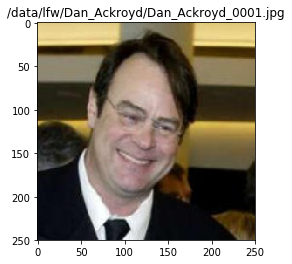

Human detected, looks like a :  Dogue de bordeaux


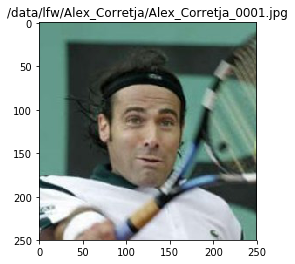

Human detected, looks like a :  Lakeland terrier


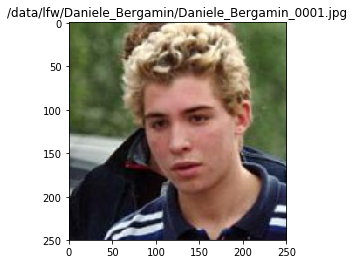

Human detected, looks like a :  American water spaniel


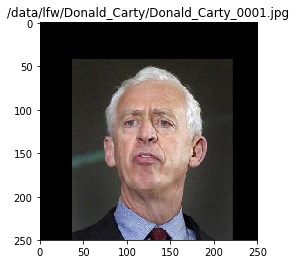

Human detected, looks like a :  Dogue de bordeaux


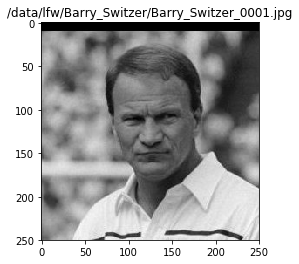

Human detected, looks like a :  Dogue de bordeaux


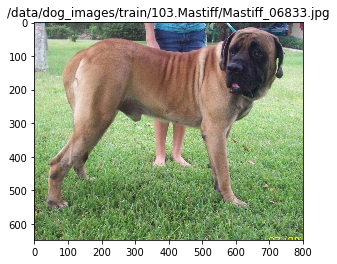

Bad detection. What is that?


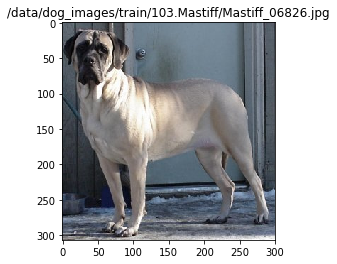

Dog detected. Breed Mastiff


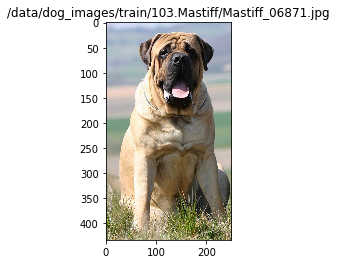

Dog detected. Breed Mastiff


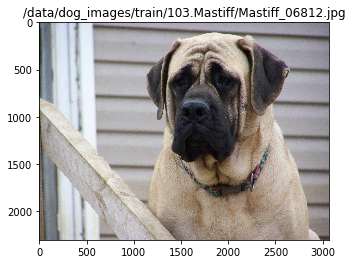

Bad detection. What is that?


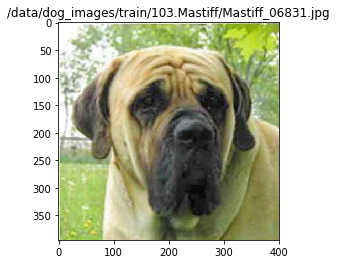

Dog detected. Breed Mastiff


In [23]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
from PIL import Image
import matplotlib.pyplot as plt                        
%matplotlib inline 

## suggested code, below
for file in np.hstack((human_files[:5], dog_files[:5])):
    run_app(file)

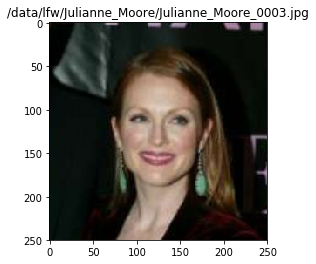

Human detected, looks like a :  Dogue de bordeaux


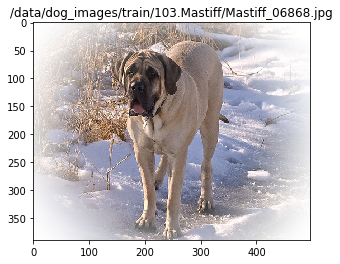

Dog detected. Breed Mastiff


In [25]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
from PIL import Image
import matplotlib.pyplot as plt                        
%matplotlib inline 

## suggested code, below
for file in np.hstack((human_files[50], dog_files[50])):
    run_app(file)

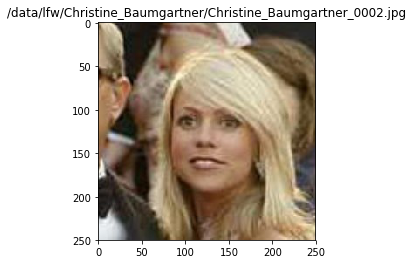

Human detected, looks like a :  American water spaniel


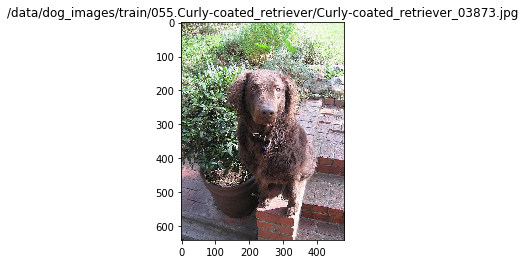

Dog detected. Breed Curly-coated retriever


In [26]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
from PIL import Image
import matplotlib.pyplot as plt                        
%matplotlib inline 

## suggested code, below
for file in np.hstack((human_files[150], dog_files[150])):
    run_app(file)

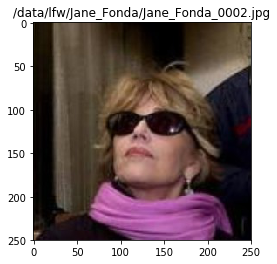

Bad detection. What is that?


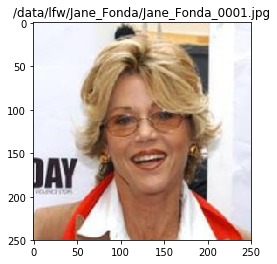

Human detected, looks like a :  Afghan hound


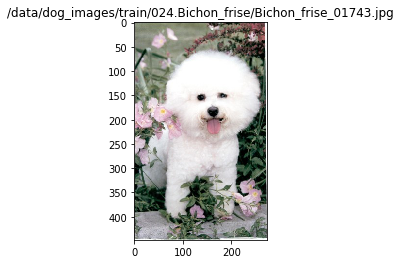

Dog detected. Breed Bichon frise


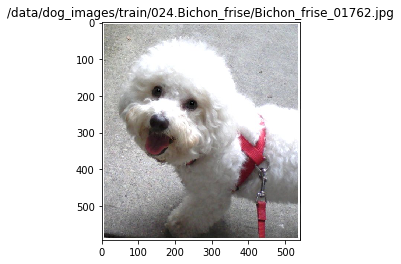

Dog detected. Breed Bichon frise


In [27]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
from PIL import Image
import matplotlib.pyplot as plt                        
%matplotlib inline 

## suggested code, below
for file in np.hstack((human_files[250:252], dog_files[250:252])):
    run_app(file)